### Reference : https://github.com/mobigen/datafairness-mitigate

In [1]:
# coding: utf-8

# Import Packages

from utils import datasets

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

data/raw/adult/adult.data
data/raw/adult/adult.names
data/raw/adult/adult.test


#### Data loading and preprocessing

In [2]:
# Set Columns and Protected Atrributes
# 18 Features including 2 Protected Attributes and 1 Label
protected_attribute_names = ['sex', 'race']
privileged_classes = [['Male'], ['White']]
label_name = 'income-per-year'
one_hot_features = ['Age (decade)', 'Education Years']

# Load Test Dataset & Preprocess
df = datasets.get_adults_df()
df = datasets.preprocess_df(df,
                            protected_attribute_names, privileged_classes,
                            label_name, ['>50K', '>50K.'],
                            one_hot_column_names=one_hot_features)

Missing Data: 0 rows removed.


In [3]:
df.sample(5)

,race,sex,income-per-year,Age (decade)=10,Age (decade)=20,Age (decade)=30,Age (decade)=40,Age (decade)=50,Age (decade)=60,Age (decade)=>=70,Education Years=6,Education Years=7,Education Years=8,Education Years=9,Education Years=10,Education Years=11,Education Years=12,Education Years=<6,Education Years=>12
30178,1.0,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
16263,1.0,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
17719,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
36664,1.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
7291,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [4]:
# There are no N/A values, and income-per-year needs type casting.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 48841
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   race                 48842 non-null  float64
 1   sex                  48842 non-null  float64
 2   income-per-year      48842 non-null  object 
 3   Age (decade)=10      48842 non-null  uint8  
 4   Age (decade)=20      48842 non-null  uint8  
 5   Age (decade)=30      48842 non-null  uint8  
 6   Age (decade)=40      48842 non-null  uint8  
 7   Age (decade)=50      48842 non-null  uint8  
 8   Age (decade)=60      48842 non-null  uint8  
 9   Age (decade)=>=70    48842 non-null  uint8  
 10  Education Years=6    48842 non-null  uint8  
 11  Education Years=7    48842 non-null  uint8  
 12  Education Years=8    48842 non-null  uint8  
 13  Education Years=9    48842 non-null  uint8  
 14  Education Years=10   48842 non-null  uint8  
 15  Education Years=11   48842 non-null 

In [5]:
df['income-per-year'] = df['income-per-year'].astype(int)

#### Basic statistic values

In [6]:
df.describe()

,race,sex,income-per-year,Age (decade)=10,Age (decade)=20,Age (decade)=30,Age (decade)=40,Age (decade)=50,Age (decade)=60,Age (decade)=>=70,Education Years=6,Education Years=7,Education Years=8,Education Years=9,Education Years=10,Education Years=11,Education Years=12,Education Years=<6,Education Years=>12
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,0.855043,0.668482,0.239282,0.051390,0.245793,0.264711,0.219565,0.135519,0.062528,0.020495,0.028439,0.037099,0.013452,0.323164,0.222718,0.042197,0.032779,0.052209,0.247942
std,0.352061,0.470764,0.426649,0.220795,0.430561,0.441184,0.413956,0.342280,0.242115,0.141686,0.166224,0.189007,0.115199,0.467690,0.416075,0.201041,0.178060,0.222451,0.431823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df['race'].value_counts()

1.0    41762
0.0     7080
Name: race, dtype: int64

In [8]:
df['sex'].value_counts()

1.0    32650
0.0    16192
Name: sex, dtype: int64

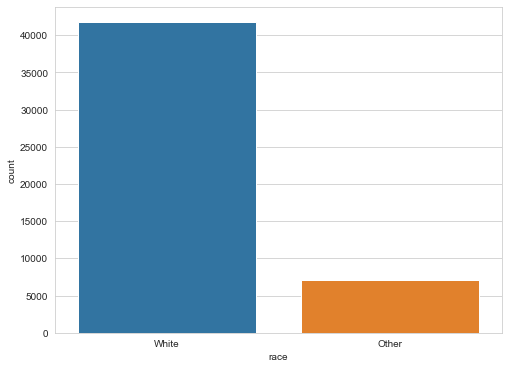

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x='race', data=pd.DataFrame(df.race.map(lambda x: ('White' if x == 1 else 'Other'))))
plt.show()

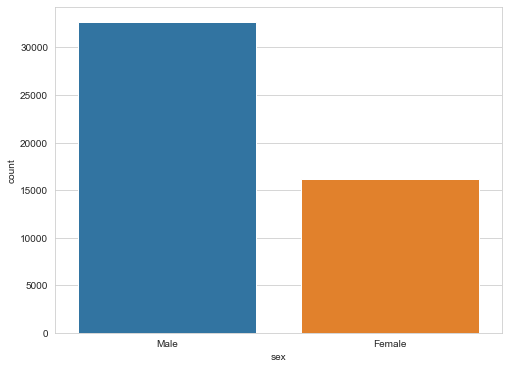

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x='sex', data=pd.DataFrame(df.sex.map(lambda x: ('Male' if x == 1 else 'Female'))))
plt.show()

#### Correlation between features

<AxesSubplot:>

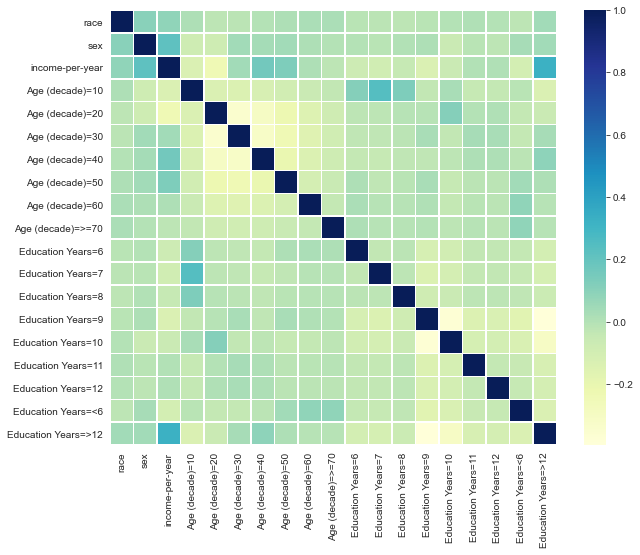

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, linewidths=0.5, cmap='YlGnBu')